install dependencies

In [1]:
!pip install diffusers==0.18.2
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.3 MB/s eta 0:00:00


create pipeline with pretrained model

In [2]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float16)

#remove nsfw filter
def dummy(images, **kwargs):
    return images, [False] * 3
pipe.safety_checker = dummy
print("safety dummy")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


safety dummy


move pipeline to gpu

In [3]:
pipe = pipe.to("cuda")

generate single images

  0%|          | 0/100 [00:00<?, ?it/s]

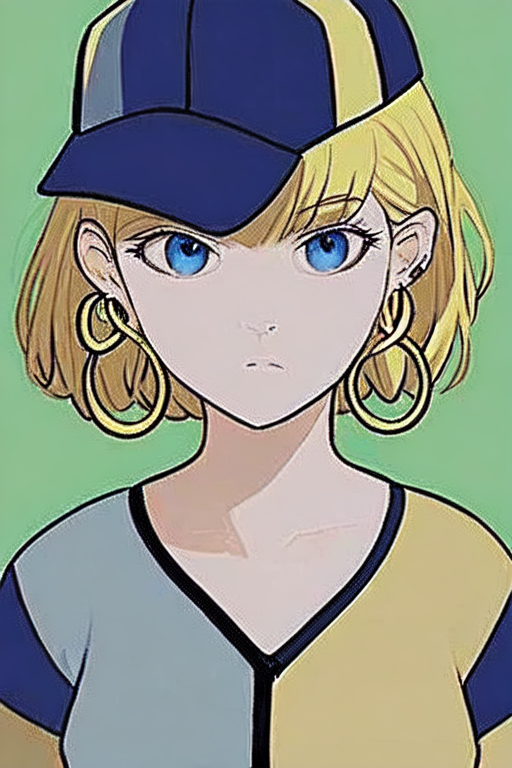

In [5]:
prompt = "1girl, blue eyes, baseball cap, blonde hair, closed mouth, earrings, green background, hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, yellow shirt"
negative_prompt = "ugly"
pipe(prompt = prompt, negative_prompt=negative_prompt, guidance_scale=8.5, num_inference_steps=100, height=768, width=512).images[0]

generate multiple images

In [6]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/100 [00:00<?, ?it/s]

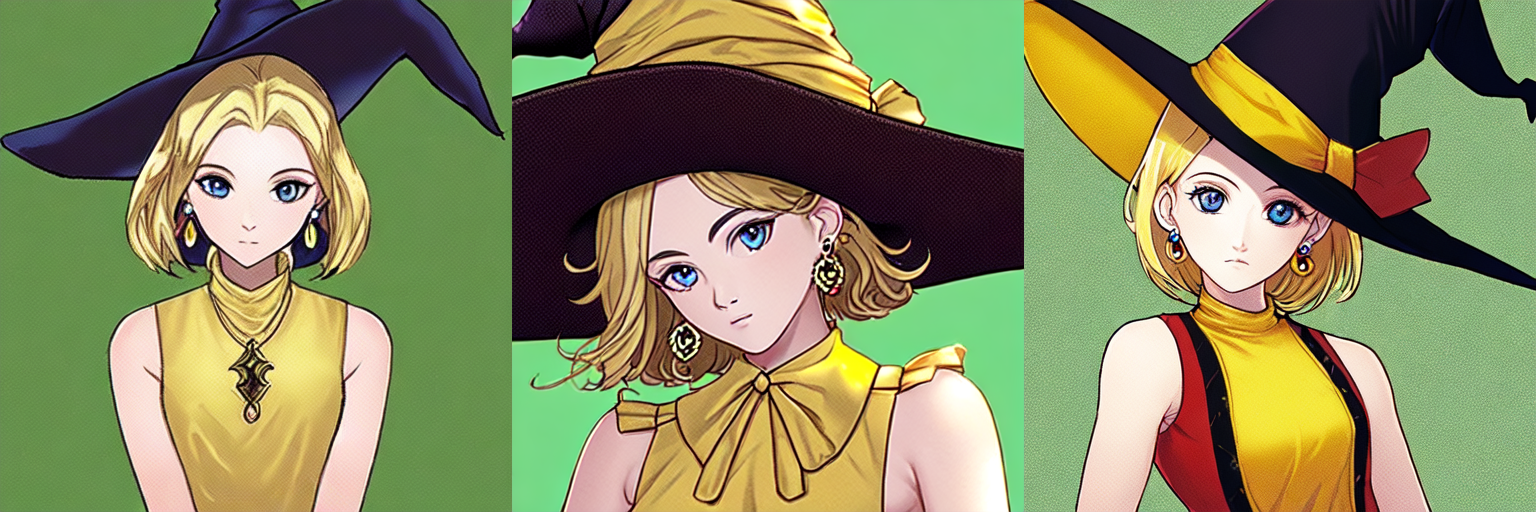

In [15]:
num_images = 3
prompt = ["1girl, blue eyes, blonde hair, closed mouth, earrings, green background, witch hat, jewelry, looking at viewer, sleeveless shirt, short hair, simple background, solo, upper body, yellow shirt"] * num_images
negative_prompt = ["ugly, blur"] * 3

images = pipe(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=8.5, num_inference_steps=100, height=512, width=512).images

grid = image_grid(images, rows=1, cols=3)
grid